# Oil and Gas Exploratory Data Analysis

In [4]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Importing historical Europe Brent oil price per barrel

In [5]:
#Importing data from EIA(Energy Information Administration)
oil_price = pd.read_excel('D:\myDocuments\oil project\Europe Brent Oil Price Per Barrel.xls','Data 1')

In [6]:
#modifying the dataframe
oil_price.drop(labels=[0,1],axis=0,inplace=True)
oil_price.reset_index(inplace=True)
oil_price.drop(labels=['index'],axis=1,inplace=True)
oil_price.rename(columns = {'Back to Contents':'Date','Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)':'Europe Brent Spot Price(Dollars per Barrel)'}, inplace = True)
oil_df = oil_price.iloc[::-1]
oil_df.reset_index(inplace=True)
oil_df.drop(labels=['index'],axis=1,inplace=True)

In [7]:
#overview of updated dataframe
oil_df.dropna(inplace=True)
oil_df.head(5)

,Date,Europe Brent Spot Price(Dollars per Barrel)
0,2022-11-07 00:00:00,99.87
1,2022-11-04 00:00:00,99.53
2,2022-11-03 00:00:00,95.29
3,2022-11-02 00:00:00,96.07
4,2022-11-01 00:00:00,95.12


Importing Historical Henry Hub Natural Gas spot price

In [8]:
#Importing data from EIA(Energy Information Administration)
gas_price = pd.read_excel(r'D:\myDocuments\oil project\Natural gas spot price.xls','Data 1')

In [9]:
#modifying the dataframe
gas_price.drop(labels=[0,1],axis=0,inplace=True)
gas_price.reset_index(inplace=True)
gas_price.drop(labels=['index'],axis=1,inplace=True)
gas_price.rename(columns = {'Back to Contents':'Date','Data 1: Spot Price':'Henry Hub Natural Gas spot price(Dollars per Million Btu)'}, inplace = True)
gas_df = gas_price.iloc[::-1]
gas_df.reset_index(inplace=True)
gas_df.drop(labels=['index'],axis=1,inplace=True)

In [10]:
#overview of updated dataframe
gas_df.dropna(inplace=True)
gas_df.head()

,Date,Henry Hub Natural Gas spot price(Dollars per Million Btu)
0,2022-11-08 00:00:00,4
1,2022-11-07 00:00:00,4.62
2,2022-11-04 00:00:00,4
3,2022-11-03 00:00:00,4.65
4,2022-11-02 00:00:00,4.58


Importing oil rig count data

In [11]:
#Importing data from EIA(Energy Information Administration)
oil_rig = pd.read_excel(r'D:\myDocuments\oil project\Drilling data.xls','Data 3')

In [12]:
#modifying the dataframe
oil_rig.drop(labels=[0,1],axis=0,inplace=True)
oil_rig.reset_index(inplace=True)
oil_rig.drop(labels=['index'],axis=1,inplace=True)
oil_rig.rename(columns = {'Back to Contents':'Date','Data 3: By Type':'Crude oil rotary rigs in operation'}, inplace = True)
oil_rig_df = oil_rig.iloc[::-1]
oil_rig_df.reset_index(inplace=True)
oil_rig_df.drop(labels=['index'],axis=1,inplace=True)
oil_rig_df.drop(labels=['Unnamed: 2'],axis=1,inplace=True)

In [13]:
#overview of updated dataframe
oil_rig_df.dropna(inplace=True)
oil_rig_df.head(5)

,Date,Crude oil rotary rigs in operation
0,2022-08-15 00:00:00,601
1,2022-07-15 00:00:00,599
2,2022-06-15 00:00:00,583
3,2022-05-15 00:00:00,568
4,2022-04-15 00:00:00,546


Importing Natural Gas Rig count data

In [14]:
#Importing data from EIA(Energy Information Administration)
gas_rig = pd.read_excel(r'D:\myDocuments\oil project\Drilling data.xls','Data 3')

In [15]:
#modifying the dataframe
gas_rig.drop(labels=[0,1],axis=0,inplace=True)
gas_rig.reset_index(inplace=True)
gas_rig.drop(labels=['index'],axis=1,inplace=True)
gas_rig.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Natural gas rotary rigs in operation'}, inplace = True)
gas_rig_df = gas_rig.iloc[::-1]
gas_rig_df.reset_index(inplace=True)
gas_rig_df.drop(labels=['index'],axis=1,inplace=True)
gas_rig_df.drop(labels=['Data 3: By Type'],axis=1,inplace=True)

In [16]:
#overview of updated dataframe
gas_rig_df.dropna(inplace=True)
gas_rig_df.head(5)

,Date,Natural gas rotary rigs in operation
0,2022-08-15 00:00:00,160
1,2022-07-15 00:00:00,154
2,2022-06-15 00:00:00,153
3,2022-05-15 00:00:00,149
4,2022-04-15 00:00:00,142


Total Rig Count 

In [17]:
#Importing data from EIA(Energy Information Administration)
total_rig = pd.read_excel(r'D:\myDocuments\oil project\Drilling data.xls','Data 1')

In [18]:
#modifying the dataframe
total_rig.drop(labels=[0,1],axis=0,inplace=True)
total_rig.reset_index(inplace=True)
total_rig.drop(labels=['index'],axis=1,inplace=True)
total_rig.rename(columns = {'Back to Contents':'Date','Data 1: Rotary Rigs in Operation':'Total Rotary Rigs in operation'}, inplace = True)
total_rig_df = total_rig.iloc[::-1]
total_rig_df.reset_index(inplace=True)
total_rig_df.drop(labels=['index'],axis=1,inplace=True)

In [19]:
#overview of updated dataframe
total_rig_df.dropna(inplace=True)
total_rig_df.head(5)

,Date,Total Rotary Rigs in operation
0,2022-08-15 00:00:00,764
1,2022-07-15 00:00:00,757
2,2022-06-15 00:00:00,738
3,2022-05-15 00:00:00,719
4,2022-04-15 00:00:00,690


Total Rig count based on ONSHORE or OFFSHORE

Total Onshore Rig Count

In [20]:
#Importing data from EIA(Energy Information Administration)
onshore_rig = pd.read_excel(r'D:\myDocuments\oil project\Drilling data.xls','Data 2')

In [21]:
#modifying the dataframe
onshore_rig.drop(labels=[0,1],axis=0,inplace=True)
onshore_rig.reset_index(inplace=True)
onshore_rig.drop(labels=['index'],axis=1,inplace=True)
onshore_rig.rename(columns = {'Back to Contents':'Date','Data 2: By Site':'Total Onshore Rotary Rigs in operation'}, inplace = True)
onshore_rig_df = onshore_rig.iloc[::-1]
onshore_rig_df.reset_index(inplace=True)
onshore_rig_df.drop(labels=['index'],axis=1,inplace=True)
onshore_rig_df.drop(labels=['Unnamed: 2'],axis=1,inplace=True)

In [22]:
#overview of updated dataframe
onshore_rig_df.dropna(inplace=True)
onshore_rig_df.head(5)

,Date,Total Onshore Rotary Rigs in operation
0,2022-08-15 00:00:00,746
1,2022-07-15 00:00:00,740
2,2022-06-15 00:00:00,723
3,2022-05-15 00:00:00,701
4,2022-04-15 00:00:00,677


Total Offshore Rig Count

In [23]:
#Importing data from EIA(Energy Information Administration)
offshore_rig = pd.read_excel(r'D:\myDocuments\oil project\Drilling data.xls','Data 2')

In [24]:
#modifying the dataframe
offshore_rig.drop(labels=[0,1],axis=0,inplace=True)
offshore_rig.reset_index(inplace=True)
offshore_rig.drop(labels=['index'],axis=1,inplace=True)
offshore_rig.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Total Offshore Rotary Rigs in operation'}, inplace = True)
offshore_rig_df = offshore_rig.iloc[::-1]
offshore_rig_df.reset_index(inplace=True)
offshore_rig_df.drop(labels=['index'],axis=1,inplace=True)
offshore_rig_df.drop(labels=['Data 2: By Site'],axis=1,inplace=True)

In [25]:
#overview of updated dataframe
offshore_rig_df.dropna(inplace=True)
offshore_rig_df.head(5)

,Date,Total Offshore Rotary Rigs in operation
0,2022-08-15 00:00:00,18
1,2022-07-15 00:00:00,16
2,2022-06-15 00:00:00,16
3,2022-05-15 00:00:00,17
4,2022-04-15 00:00:00,13


Total Well Count

In [26]:
#Importing data from EIA(Energy Information Administration)
total_well = pd.read_excel(r'D:\myDocuments\oil project\Well data.xls','Data 1')

In [27]:
#modifying the dataframe
total_well.drop(labels=[0,1],axis=0,inplace=True)
total_well.reset_index(inplace=True)
total_well.drop(labels=['index'],axis=1,inplace=True)
total_well.rename(columns = {'Back to Contents':'Date','Data 1: Wells Drilled (Number)':'Total Wells Drilled(Count)'}, inplace = True)
total_well_df = total_well.iloc[::-1]
total_well_df.reset_index(inplace=True)
total_well_df.drop(labels=['index'],axis=1,inplace=True)
total_well_df = total_well_df.drop(total_well_df.columns[[2,3,4,5,6,7,8,9,10,11,12]], axis=1)
total_well_df.dropna(inplace=True)
total_well_df.reset_index(inplace=True)
total_well_df.drop(labels=['index'],axis=1,inplace=True)

In [28]:
#overview of updated dataframe
total_well_df.dropna(inplace=True)
total_well_df.head(5)

,Date,Total Wells Drilled(Count)
0,2010-12-15 00:00:00,3158
1,2010-11-15 00:00:00,3294
2,2010-10-15 00:00:00,3527
3,2010-09-15 00:00:00,3218
4,2010-08-15 00:00:00,3404


Oil Well Count

In [29]:
#Importing data from EIA(Energy Information Administration)
oil_well = pd.read_excel(r'D:\myDocuments\oil project\Well data.xls','Data 1')

In [30]:
#modifying the dataframe
oil_well.drop(labels=[0,1],axis=0,inplace=True)
oil_well.reset_index(inplace=True)
oil_well.drop(labels=['index'],axis=1,inplace=True)
oil_well.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Oil Wells Drilled(Count)'}, inplace = True)
oil_well_df = oil_well.iloc[::-1]
oil_well_df.reset_index(inplace=True)
oil_well_df.drop(labels=['index'],axis=1,inplace=True)
oil_well_df = oil_well_df.drop(oil_well_df.columns[[1,3,4,5,6,7,8,9,10,11,12]], axis=1)
oil_well_df.dropna(inplace=True)
oil_well_df.reset_index(inplace=True)
oil_well_df.drop(labels=['index'],axis=1,inplace=True)

In [31]:
#overview of updated dataframe
oil_well_df.dropna(inplace=True)
oil_well_df.head(5)

,Date,Oil Wells Drilled(Count)
0,2010-12-15 00:00:00,1374
1,2010-11-15 00:00:00,1462
2,2010-10-15 00:00:00,1577
3,2010-09-15 00:00:00,1431
4,2010-08-15 00:00:00,1490


Gas Wells Drilled

In [32]:
#Importing data from EIA(Energy Information Administration)
gas_well = pd.read_excel(r'D:\myDocuments\oil project\Well data.xls','Data 1')

In [33]:
#modifying the dataframe
gas_well.drop(labels=[0,1],axis=0,inplace=True)
gas_well.reset_index(inplace=True)
gas_well.drop(labels=['index'],axis=1,inplace=True)
gas_well.rename(columns = {'Back to Contents':'Date','Unnamed: 3':'Gas Wells Drilled(Count)'}, inplace = True)
gas_well_df = gas_well.iloc[::-1]
gas_well_df.reset_index(inplace=True)
gas_well_df.drop(labels=['index'],axis=1,inplace=True)
gas_well_df = gas_well_df.drop(gas_well_df.columns[[1,2,4,5,6,7,8,9,10,11,12]], axis=1)
gas_well_df.dropna(inplace=True)
gas_well_df.reset_index(inplace=True)
gas_well_df.drop(labels=['index'],axis=1,inplace=True)

In [34]:
#overview of updated dataframe
gas_well_df.dropna(inplace=True)
gas_well_df.head(5)

,Date,Gas Wells Drilled(Count)
0,2010-12-15 00:00:00,1471
1,2010-11-15 00:00:00,1466
2,2010-10-15 00:00:00,1550
3,2010-09-15 00:00:00,1431
4,2010-08-15 00:00:00,1506


US crude oil import

In [35]:
#Importing data from EIA(Energy Information Administration)
oil_import = pd.read_excel(r'D:\myDocuments\oil project\US crude oil import.xls','Data 1')

In [36]:
#modifying the dataframe
oil_import.drop(labels=[0,1],axis=0,inplace=True)
oil_import.reset_index(inplace=True)
oil_import.drop(labels=['index'],axis=1,inplace=True)
oil_import_df = oil_import.iloc[::-1]
oil_import_df = oil_import_df.filter(['Back to Contents', 'Unnamed: 2'])
oil_import_df.reset_index(inplace=True)
oil_import_df.drop(labels=['index'],axis=1,inplace=True)
oil_import_df.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Oil imported(Thousand Barrels)'}, inplace = True)
oil_import_df.dropna(inplace=True)
oil_import_df.reset_index(inplace=True)
oil_import_df.drop(labels=['index'],axis=1,inplace=True)

In [37]:
#overview of updated dataframe
oil_import_df.dropna(inplace=True)
oil_import_df.head(5)

,Date,Oil imported(Thousand Barrels)
0,2022-08-15 00:00:00,196232
1,2022-07-15 00:00:00,204719
2,2022-06-15 00:00:00,194195
3,2022-05-15 00:00:00,191050
4,2022-04-15 00:00:00,181770


US crude oil export

In [38]:
#Importing data from EIA(Energy Information Administration)
oil_export = pd.read_excel(r'D:\myDocuments\oil project\US crude oil export.xls','Data 1')

In [39]:
#modifying the dataframe
oil_export.drop(labels=[0,1],axis=0,inplace=True)
oil_export.reset_index(inplace=True)
oil_export.drop(labels=['index'],axis=1,inplace=True)
oil_export_df = oil_export.iloc[::-1]
oil_export_df = oil_export_df.filter(['Back to Contents', 'Unnamed: 2'])
oil_export_df.reset_index(inplace=True)
oil_export_df.drop(labels=['index'],axis=1,inplace=True)
oil_export_df.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Oil exported(Thousand Barrels)'}, inplace = True)
oil_export_df.dropna(inplace=True)
oil_export_df.reset_index(inplace=True)
oil_export_df.drop(labels=['index'],axis=1,inplace=True)

In [40]:
#overview of updated dataframe
oil_export_df.dropna(inplace=True)
oil_export_df.head(5)

,Date,Oil exported(Thousand Barrels)
0,2022-08-15 00:00:00,113235
1,2022-07-15 00:00:00,117665
2,2022-06-15 00:00:00,107153
3,2022-05-15 00:00:00,106707
4,2022-04-15 00:00:00,97177


US crude oil production

In [41]:
#Importing data from EIA(Energy Information Administration)
oil_produce = pd.read_excel(r'D:\myDocuments\oil project\US crude oil production.xls','Data 1')

In [42]:
#modifying the dataframe
oil_produce.drop(labels=[0,1],axis=0,inplace=True)
oil_produce.reset_index(inplace=True)
oil_produce.drop(labels=['index'],axis=1,inplace=True)
oil_produce_df = oil_produce.iloc[::-1]
oil_produce_df = oil_produce_df.filter(['Back to Contents', 'Data 1: Crude Oil Production'])
oil_produce_df.reset_index(inplace=True)
oil_produce_df.drop(labels=['index'],axis=1,inplace=True)
oil_produce_df.rename(columns = {'Back to Contents':'Date','Data 1: Crude Oil Production':'Oil produced(Thousand Barrels)'}, inplace = True)
oil_produce_df.dropna(inplace=True)
oil_produce_df.reset_index(inplace=True)
oil_produce_df.drop(labels=['index'],axis=1,inplace=True)

In [43]:
#overview of updated dataframe
oil_produce_df.dropna(inplace=True)
oil_produce_df.head(5)

,Date,Oil produced(Thousand Barrels)
0,2022-08-15 00:00:00,371233
1,2022-07-15 00:00:00,368077
2,2022-06-15 00:00:00,353918
3,2022-05-15 00:00:00,360503
4,2022-04-15 00:00:00,350052


US crude oil consumption

In [44]:
#Importing data from EIA(Energy Information Administration)
oil_consume = pd.read_excel(r'D:\myDocuments\oil project\US crude oil consumption.xls','Data 1')

In [45]:
#modifying the dataframe
oil_consume.drop(labels=[0,1],axis=0,inplace=True)
oil_consume.reset_index(inplace=True)
oil_consume.drop(labels=['index'],axis=1,inplace=True)
oil_consume_df = oil_consume.iloc[::-1]
oil_consume_df = oil_consume_df.filter(['Back to Contents', 'Data 1: U.S. Product Supplied for Crude Oil and Petroleum Products'])
oil_consume_df.reset_index(inplace=True)
oil_consume_df.drop(labels=['index'],axis=1,inplace=True)
oil_consume_df.rename(columns = {'Back to Contents':'Date','Data 1: U.S. Product Supplied for Crude Oil and Petroleum Products':'Oil consumed(Thousand Barrels)'}, inplace = True)
oil_consume_df.dropna(inplace=True)
oil_consume_df.reset_index(inplace=True)
oil_consume_df.drop(labels=['index'],axis=1,inplace=True)

In [46]:
#overview of updated dataframe
oil_consume_df.dropna(inplace=True)
oil_consume_df.head(5)

,Date,Oil consumed(Thousand Barrels)
0,2022-08-15 00:00:00,638632
1,2022-07-15 00:00:00,630696
2,2022-06-15 00:00:00,623159
3,2022-05-15 00:00:00,622381
4,2022-04-15 00:00:00,598721


US natural gas import

In [47]:
#Importing data from EIA(Energy Information Administration)
gas_import = pd.read_excel(r'D:\myDocuments\oil project\US gas import.xls','Data 1')

In [48]:
#modifying the dataframe
gas_import.drop(labels=[0,1],axis=0,inplace=True)
gas_import.reset_index(inplace=True)
gas_import.drop(labels=['index'],axis=1,inplace=True)
gas_import_df = gas_import.iloc[::-1]
gas_import_df = gas_import_df.filter(['Back to Contents', 'Data 1: Import Volumes'])
gas_import_df.reset_index(inplace=True)
gas_import_df.drop(labels=['index'],axis=1,inplace=True)
gas_import_df.rename(columns = {'Back to Contents':'Date','Data 1: Import Volumes':'Gas imported(MMcf)'}, inplace = True)
gas_import_df.dropna(inplace=True)
gas_import_df.reset_index(inplace=True)
gas_import_df.drop(labels=['index'],axis=1,inplace=True)

In [49]:
#overview of updated dataframe
gas_import_df.dropna(inplace=True)
gas_import_df.head(5)

,Date,Gas imported(MMcf)
0,2022-08-15 00:00:00,235798
1,2022-07-15 00:00:00,257067
2,2022-06-15 00:00:00,228741
3,2022-05-15 00:00:00,230744
4,2022-04-15 00:00:00,244864


US natural gas export

In [50]:
#Importing data from EIA(Energy Information Administration)
gas_export = pd.read_excel(r'D:\myDocuments\oil project\US gas export.xls','Data 1')

In [51]:
#modifying the dataframe
gas_export.drop(labels=[0,1],axis=0,inplace=True)
gas_export.reset_index(inplace=True)
gas_export.drop(labels=['index'],axis=1,inplace=True)
gas_export_df = gas_export.iloc[::-1]
gas_export_df = gas_export_df.filter(['Back to Contents', 'Data 1: U.S. Natural Gas Pipeline Exports by Point of Exit '])
gas_export_df.reset_index(inplace=True)
gas_export_df.drop(labels=['index'],axis=1,inplace=True)
gas_export_df.rename(columns = {'Back to Contents':'Date','Data 1: U.S. Natural Gas Pipeline Exports by Point of Exit ':'Gas exported(MMcf)'}, inplace = True)
gas_export_df.dropna(inplace=True)
gas_export_df.reset_index(inplace=True)
gas_export_df.drop(labels=['index'],axis=1,inplace=True)

In [52]:
#overview of updated dataframe
gas_export_df.dropna(inplace=True)
gas_export_df.head(5)

,Date,Gas exported(MMcf)
0,2022-08-15 00:00:00,254542
1,2022-07-15 00:00:00,256080
2,2022-06-15 00:00:00,249883
3,2022-05-15 00:00:00,262861
4,2022-04-15 00:00:00,255808


US natural gas production

In [53]:
#Importing data from EIA(Energy Information Administration)
gas_produce = pd.read_excel(r'D:\myDocuments\oil project\US gas production.xls','Data 1')

In [54]:
#modifying the dataframe
gas_produce.drop(labels=[0,1],axis=0,inplace=True)
gas_produce.reset_index(inplace=True)
gas_produce.drop(labels=['index'],axis=1,inplace=True)
gas_produce_df = gas_produce.iloc[::-1]
gas_produce_df = gas_produce_df.filter(['Back to Contents', 'Unnamed: 2'])
gas_produce_df.reset_index(inplace=True)
gas_produce_df.drop(labels=['index'],axis=1,inplace=True)
gas_produce_df.rename(columns = {'Back to Contents':'Date','Unnamed: 2':'Gas produced(MMcf)'}, inplace = True)
gas_produce_df.dropna(inplace=True)
gas_produce_df.reset_index(inplace=True)
gas_produce_df.drop(labels=['index'],axis=1,inplace=True)

In [55]:
#overview of updated dataframe
gas_produce_df.dropna(inplace=True)
gas_produce_df.head(5)

,Date,Gas produced(MMcf)
0,2022-08-15 00:00:00,3350213
1,2022-07-15 00:00:00,3333138
2,2022-06-15 00:00:00,3214637
3,2022-05-15 00:00:00,3295871
4,2022-04-15 00:00:00,3151649


US natural gas consumption

In [56]:
#Importing data from EIA(Energy Information Administration)
gas_consume = pd.read_excel(r'D:\myDocuments\oil project\US gas consumption.xls','Data 1')

In [57]:
#modifying the dataframe
gas_consume.drop(labels=[0,1],axis=0,inplace=True)
gas_consume.reset_index(inplace=True)
gas_consume.drop(labels=['index'],axis=1,inplace=True)
gas_consume_df = gas_consume.iloc[::-1]
gas_consume_df = gas_consume_df.filter(['Back to Contents', 'Data 1: U.S. Natural Gas Consumption by End Use'])
gas_consume_df.reset_index(inplace=True)
gas_consume_df.drop(labels=['index'],axis=1,inplace=True)
gas_consume_df.rename(columns = {'Back to Contents':'Date','Data 1: U.S. Natural Gas Consumption by End Use':'Gas consumed(MMcf)'}, inplace = True)
gas_consume_df.dropna(inplace=True)
gas_consume_df.reset_index(inplace=True)
gas_consume_df.drop(labels=['index'],axis=1,inplace=True)

In [58]:
#overview of updated dataframe
gas_consume_df.dropna(inplace=True)
gas_consume_df.head(5)

,Date,Gas consumed(MMcf)
0,2022-08-15 00:00:00,2566066
1,2022-07-15 00:00:00,2597910
2,2022-06-15 00:00:00,2326936
3,2022-05-15 00:00:00,2247746
4,2022-04-15 00:00:00,2379312


DATA ANALYSIS and VISUALIZATION

In [59]:
#merging oil price and gas price dataframes
df = pd.merge(left=oil_df,right=gas_df,how='left',on='Date')

#dataframe overview
df.head(7)

,Date,Europe Brent Spot Price(Dollars per Barrel),Henry Hub Natural Gas spot price(Dollars per Million Btu)
0,2022-11-07 00:00:00,99.87,4.62
1,2022-11-04 00:00:00,99.53,4
2,2022-11-03 00:00:00,95.29,4.65
3,2022-11-02 00:00:00,96.07,4.58
4,2022-11-01 00:00:00,95.12,4.57
5,2022-10-31 00:00:00,93.3,5.02
6,2022-10-28 00:00:00,94.64,5.02


In [60]:
#combining all entries into single dataframe
df_list = [oil_rig_df, gas_rig_df, total_rig_df, onshore_rig_df, offshore_rig_df, total_well_df, oil_well_df, gas_well_df,
           oil_import_df, oil_export_df, oil_produce_df, oil_consume_df, gas_import_df, gas_export_df, gas_produce_df, gas_consume_df]

for data in range(len(df_list)):    
    df = pd.merge(left=df,right=df_list[data],how='outer', on='Date')
    
#filtering data    
cols = df.columns
df[cols[1:]] = df[cols[1:]].apply(pd.to_numeric, errors='coerce')
df["Date"] = pd.to_datetime(df["Date"])

#dataframe overview
df.head(7)

,Date,Europe Brent Spot Price(Dollars per Barrel),Henry Hub Natural Gas spot price(Dollars per Million Btu),Crude oil rotary rigs in operation,Natural gas rotary rigs in operation,Total Rotary Rigs in operation,Total Onshore Rotary Rigs in operation,Total Offshore Rotary Rigs in operation,Total Wells Drilled(Count),Oil Wells Drilled(Count),Gas Wells Drilled(Count),Oil imported(Thousand Barrels),Oil exported(Thousand Barrels),Oil produced(Thousand Barrels),Oil consumed(Thousand Barrels),Gas imported(MMcf),Gas exported(MMcf),Gas produced(MMcf),Gas consumed(MMcf)
0,2022-11-07,99.87,4.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-04,99.53,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-03,95.29,4.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-02,96.07,4.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-01,95.12,4.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-10-31,93.30,5.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-10-28,94.64,5.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Statistical analysis

In [61]:
#statistical values
df.describe().transpose()[['count','mean','min','max','std']].round(2)

,count,mean,min,max,std
Europe Brent Spot Price(Dollars per Barrel),9004.0,48.39,9.10,143.95,32.85
Henry Hub Natural Gas spot price(Dollars per Million Btu),6428.0,4.24,1.05,23.86,2.20
Crude oil rotary rigs in operation,421.0,498.21,108.00,1596.00,356.78
Natural gas rotary rigs in operation,421.0,573.09,70.00,1585.00,390.69
Total Rotary Rigs in operation,596.0,1378.80,250.00,4521.00,754.25
Total Onshore Rotary Rigs in operation,596.0,1273.23,237.00,4238.00,704.06
Total Offshore Rotary Rigs in operation,596.0,102.57,6.00,283.00,64.18
Total Wells Drilled(Count),456.0,3479.42,1051.00,8556.00,1656.70
Oil Wells Drilled(Count),456.0,1354.57,223.00,3945.00,904.62
Gas Wells Drilled(Count),456.0,1259.27,454.00,3200.00,626.15


Visualizing data

Time Series analysis of operating rotary rig count for crude oil, natural gas and total combined.

Text(0, 0.5, 'Operating Rig Count')

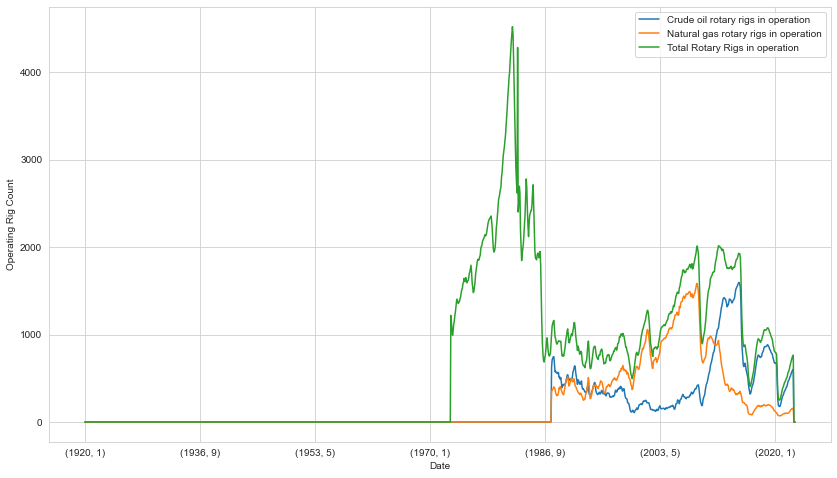

In [62]:
sns.set_style('whitegrid')
for rig_count in ['Crude oil rotary rigs in operation','Natural gas rotary rigs in operation','Total Rotary Rigs in operation']:
    df.groupby([df['Date'].dt.year,df['Date'].dt.month])[rig_count].sum().plot.line(figsize=(14,8))
plt.legend() 
plt.xlabel('Date')
plt.ylabel('Operating Rig Count')

Time Series analysis of drilled well count for crude oil, natural gas and total combined.

Text(0, 0.5, 'Drilled Well count')

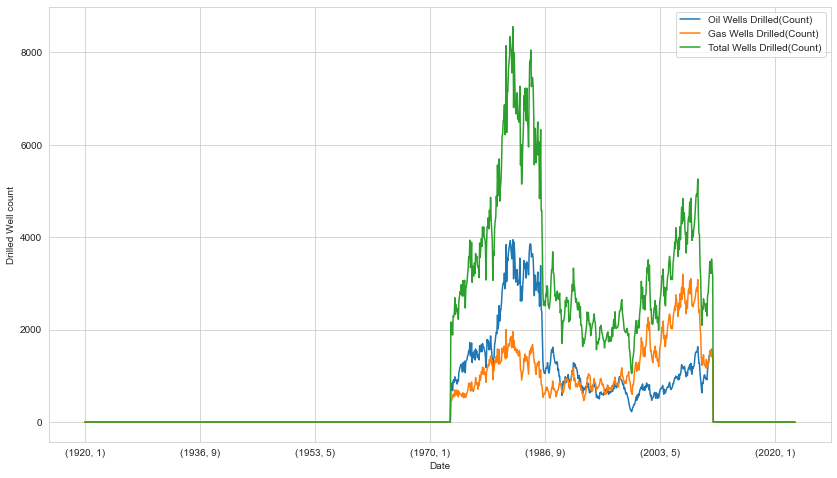

In [63]:
sns.set_style('whitegrid')
for rig_count in ['Oil Wells Drilled(Count)','Gas Wells Drilled(Count)','Total Wells Drilled(Count)']:
    df.groupby([df['Date'].dt.year,df['Date'].dt.month])[rig_count].sum().plot.line(figsize=(14,8))
plt.legend() 
plt.xlabel('Date')
plt.ylabel('Drilled Well count')

Time Series analysis of variations in Crude oil import, export, production and consumption.

Text(0.5, 0, 'Date')

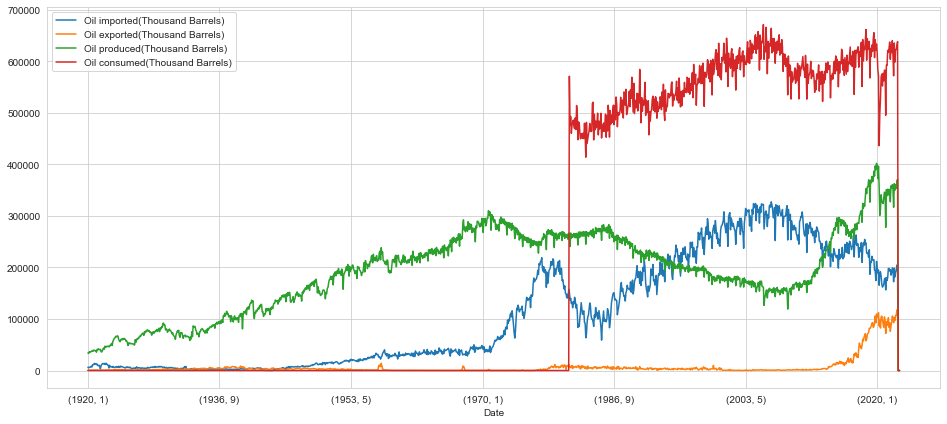

In [64]:
for feature in ['Oil imported(Thousand Barrels)','Oil exported(Thousand Barrels)','Oil produced(Thousand Barrels)','Oil consumed(Thousand Barrels)']:
    df.groupby([df['Date'].dt.year,df['Date'].dt.month])[feature].sum().plot.line(figsize=(16,7))
plt.legend() 
plt.xlabel('Date')

Time Series analysis of variations in Natural Gas import, export, production and consumption.

Text(0.5, 0, 'Date')

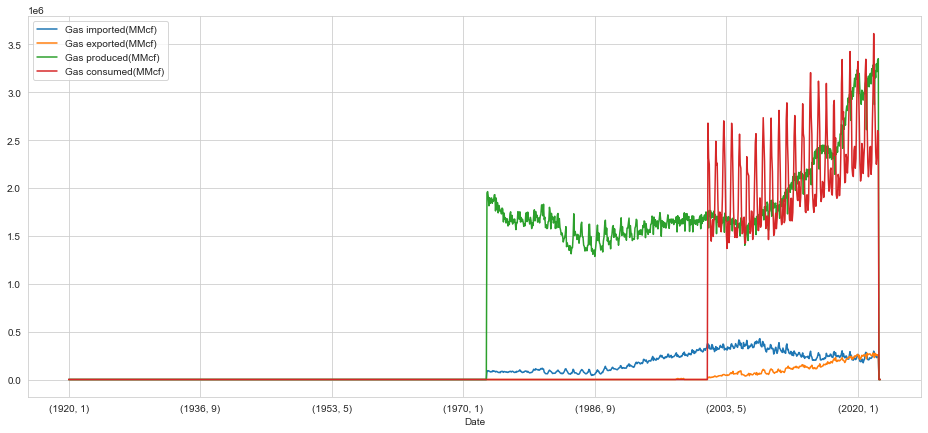

In [65]:
for feature in ['Gas imported(MMcf)','Gas exported(MMcf)','Gas produced(MMcf)','Gas consumed(MMcf)']:
    df.groupby([df['Date'].dt.year,df['Date'].dt.month])[feature].sum().plot.line(figsize=(16,7))
plt.legend() 
plt.xlabel('Date')